In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

In [2]:
df = pd.read_csv('data/structured_data.csv', parse_dates=[3])
df["day"] = df["date"].apply(lambda x: x.day_name())
df["hour"] = df["date"].apply(lambda x: x.hour)
df["month"] = df["date"].apply(lambda x: x.month_name())
df.head()

,description,_id,size,date,probability_1_class,probability_1_value,probability_2_class,probability_2_value,probability_3_class,probability_3_value,...,probability_13_value,probability_14_class,probability_14_value,probability_15_class,probability_15_value,probability_16_class,probability_16_value,day,hour,month
0,Campus Miraflores,627e94c47b283211c24d0eb7,514727,2022-05-09 10:59:59,animal/others,1.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,10,May
1,Campus Miraflores,628006fbae49cd33b56d495f,8640044,2022-05-13 13:33:21,environmental/wind,0.709,animal/others,0.105,environmental/rain,0.060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,13,May
2,Campus Miraflores,62800724ae49cd33b56d4962,8640044,2022-05-14 15:50:52,alerts/siren,0.358,environmental/wind,0.107,mechanical/air_conditioner,0.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,15,May
3,Campus Miraflores,6280074cae49cd33b56d4965,8640044,2022-05-13 14:27:53,alerts/siren,0.309,mechanical/others,0.305,environmental/wind,0.110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,14,May
4,Campus Miraflores,62800776ae49cd33b56d4968,8640044,2022-05-13 18:44:27,alerts/siren,0.292,mechanical/air_conditioner,0.177,alerts/horns,0.135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,18,May


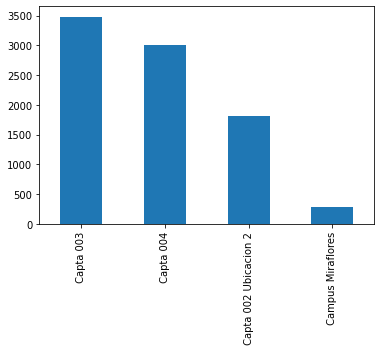

In [3]:
fig, ax = plt.subplots(facecolor='w')
df["description"].value_counts().plot(kind='bar', ax=ax);

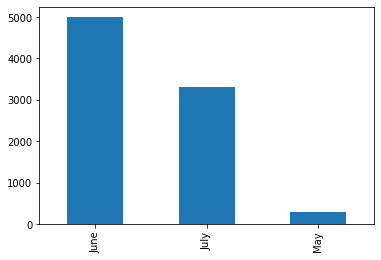

In [4]:
fig, ax = plt.subplots(facecolor='w')
df["month"].value_counts().plot(kind='bar', ax=ax);

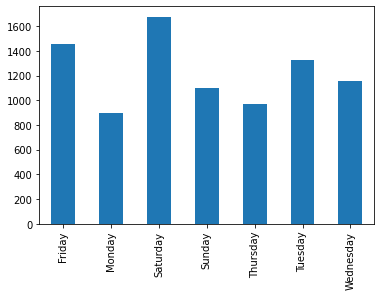

In [5]:
fig, ax = plt.subplots(facecolor='w')
df["day"].value_counts().sort_index().plot(kind='bar', ax=ax);

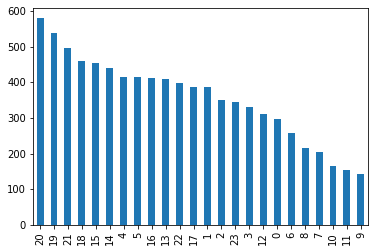

In [6]:
fig, ax = plt.subplots(facecolor='w')
df["hour"].value_counts().plot(kind='bar', ax=ax);

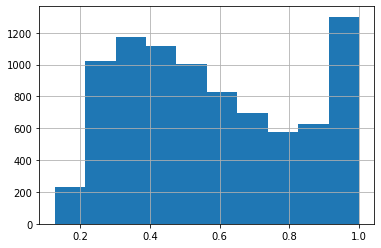

In [7]:
fig, ax = plt.subplots(facecolor='w')
df["probability_1_value"].hist(ax=ax);

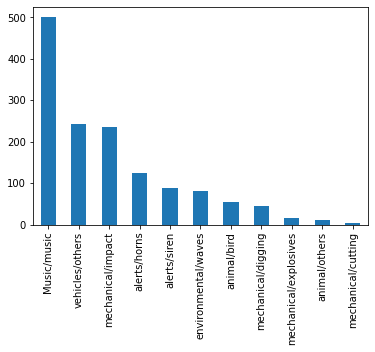

In [8]:
fig, ax = plt.subplots(facecolor='w')
df["probability_1_class"].loc[df["probability_1_value"] > 0.9].value_counts().plot(kind='bar', ax=ax);

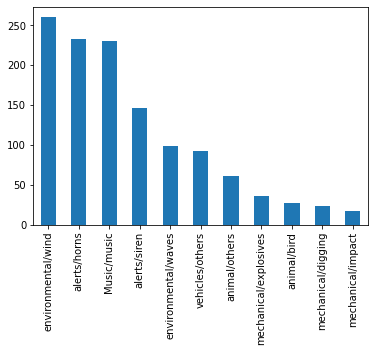

In [9]:
fig, ax = plt.subplots(facecolor='w')
df["probability_1_class"].loc[df["probability_1_value"] < 0.3].value_counts().plot(kind='bar', ax=ax);

200


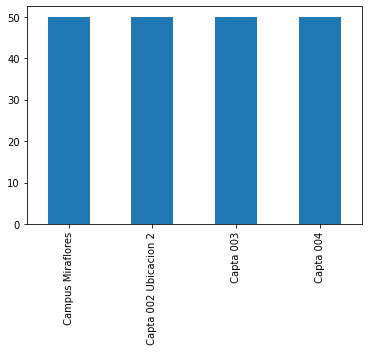

In [10]:
gb = df.loc[df["probability_1_value"]<0.3].groupby(by=['description'])

sub_df1 = gb.sample(n=50, random_state=1234)

print(len(sub_df1))
fig, ax = plt.subplots(facecolor='w')
sub_df1["description"].value_counts().plot(kind='bar', ax=ax);

332


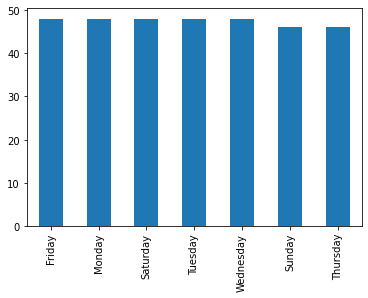

In [26]:
gb = df.loc[df["probability_1_value"]<0.3].groupby(by=['day', 'hour'])

sub_df2 = gb.sample(n=2, random_state=1234, replace=True)
print(len(sub_df2))

fig, ax = plt.subplots(facecolor='w')
sub_df2["day"].value_counts().plot(kind='bar', ax=ax);

80


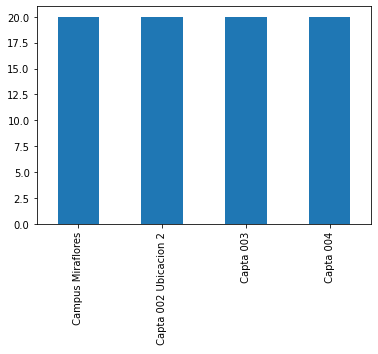

In [12]:
gb = df.loc[df["probability_1_value"]>0.8].groupby(by=['description'])

sub_df4 = gb.sample(n=20, random_state=1234, replace=True)

print(len(sub_df4))
fig, ax = plt.subplots(facecolor='w')
sub_df4["description"].value_counts().plot(kind='bar', ax=ax);

120


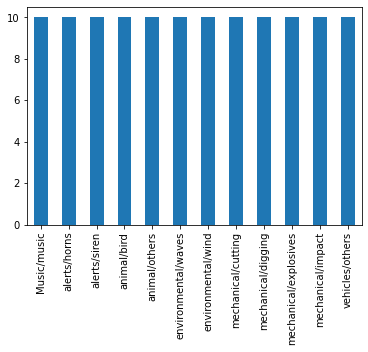

In [13]:
gb = df.loc[df["probability_1_value"]>0.8].groupby(by=['probability_1_class'])

sub_df3 = gb.sample(n=10, random_state=1234,replace=True)
print(len(sub_df3))

fig, ax = plt.subplots(facecolor='w')
#sub_df["description"].value_counts().plot(kind='bar', ax=ax);
sub_df3["probability_1_class"].value_counts().plot(kind='bar', ax=ax);

In [29]:
len(sub_df1) + len(sub_df2) + len(sub_df3) + len(sub_df4)

732

In [34]:
mega_df = pd.concat([sub_df1.set_index('_id'), 
                     sub_df2.set_index('_id'),
                     sub_df3.set_index('_id'),
                     sub_df4.set_index('_id')])

mega_df = mega_df[~mega_df.index.duplicated(keep='first')]
mega_df.to_csv('subsample.csv')

In [35]:
len(mega_df)

620